<a href="https://colab.research.google.com/github/Jdzubina/Python---Data-and-AI/blob/main/SingleNeuron_neuralnetworks_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Learning**

Deep learning is a type of machine learning that uses layers of neural networks. Hence "deep". It originated from the concept of emulating the human mind and brain. These networks excel in handling large datasets and complex patterns, making them ideal for tasks like image recognition, natural language processing, and IoT applications. New techniques like convolutional neural networks (CNNs) and recurrent neural networks (RNNs)have advanced these networks even futher. The growth of deep learning has been helped by the availability of large datasets and faster computing power from GPUs, allowing for more efficient training of these deep networks.

**Single Neuron Code Sample**

In [ ]:
# import required libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
# Initialize the artificial neuron
class ArtificialNeuron:
    def __init__(self,N=2, act_func=tf.nn.sigmoid, learning_rate= 0.001):
        self.N = N # Number of inputs to the neuron
        self.act_fn = act_func # Activation function

        # Build the graph for a single neuron
        self.W = tf.Variable(tf.random_normal([N,1], stddev=2, seed = 0))
        self.bias = tf.Variable(0.0, dtype=tf.float32)
        self.X = tf.placeholder(tf.float32, name='X', shape=[None,N])
        self.y = tf.placeholder(tf.float32, name='Y')

        # Compute the activity of the neuron
        activity = tf.matmul(self.X, self.W) + self.bias
        self.y_hat = self.act_fn(activity)

        # Compute the error
        error = self.y - self.y_hat

        # Define the loss function (Mean Squared Error)
        self.loss = tf.reduce_mean(tf.square(error))
        # Define the optimizer (Gradient Descent)
        self.opt =  tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(self.loss)

        # Initialize all variables
        init = tf.global_variables_initializer()

        # Create a TensorFlow session and initialize variables
        self.sess = tf.Session()
        self.sess.run(init)

        # Train the neuron on the given data.
    def train(self, X, Y, X_val, Y_val, epochs=100):
        epoch = 0
        X, Y = shuffle(X,Y) # Shuffle the training data
        loss = [] # List to store training loss
        loss_val = [] # List to store validation loss
        while epoch < epochs:
            # Run the optimizer for the whole training set batch wise (Stochastic Gradient Descent)
            _, l = self.sess.run([self.opt,self.loss], feed_dict={self.X: X, self.y: Y})
            l_val = self.sess.run(self.loss, feed_dict={self.X: X_val, self.y: Y_val})

            # Store the losses
            loss.append(l)
            loss_val.append(l_val)

            if epoch % 10 == 0:
                print("Epoch {}/{}  training loss: {} Validation loss {}".\
                      format(epoch,epochs,l, l_val ))

            epoch += 1
        return loss, loss_val
    # Make predictions using the trained neuron.
    def predict(self, X):
        return self.sess.run(self.y_hat, feed_dict={self.X: X})

In [ ]:
# Read the dataset from the Excel file
filename = 'Folds5x2_pp.xlsx'
df = pd.read_excel(filename, sheet_name='Sheet1')  # Read the Excel file into a DataFrame

# Split the data into features (X) and target variable (Y)
X, Y = df[['AT', 'V', 'AP', 'RH']], df['PE']

# Initialize a MinMaxScaler for normalizing the features
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)  # Normalize the features

# Initialize another MinMaxScaler for normalizing the target variable
target_scaler = MinMaxScaler()
Y_new = target_scaler.fit_transform(Y.values.reshape(-1, 1))  # Normalize the target variable

# Split the normalized data into training and validation sets
X_train, X_val, Y_train, y_val = train_test_split(X_new, Y_new, test_size=0.4, random_state=333)


Epoch 0/30000  training loss: 0.288099080324173 Validation loss 0.2842104136943817
Epoch 10/30000  training loss: 0.28804391622543335 Validation loss 0.28415507078170776
Epoch 20/30000  training loss: 0.28798869252204895 Validation loss 0.2840996980667114
Epoch 30/30000  training loss: 0.287933349609375 Validation loss 0.2840442359447479
Epoch 40/30000  training loss: 0.28787800669670105 Validation loss 0.28398874402046204
Epoch 50/30000  training loss: 0.28782257437705994 Validation loss 0.2839331328868866
Epoch 60/30000  training loss: 0.28776705265045166 Validation loss 0.28387755155563354
Epoch 70/30000  training loss: 0.2877114713191986 Validation loss 0.28382179141044617
Epoch 80/30000  training loss: 0.2876558303833008 Validation loss 0.2837660014629364
Epoch 90/30000  training loss: 0.2876001000404358 Validation loss 0.2837101221084595
Epoch 100/30000  training loss: 0.2875443398952484 Validation loss 0.28365418314933777
Epoch 110/30000  training loss: 0.2874884605407715 Valida

Text(0, 0.5, 'Mean Square Error')

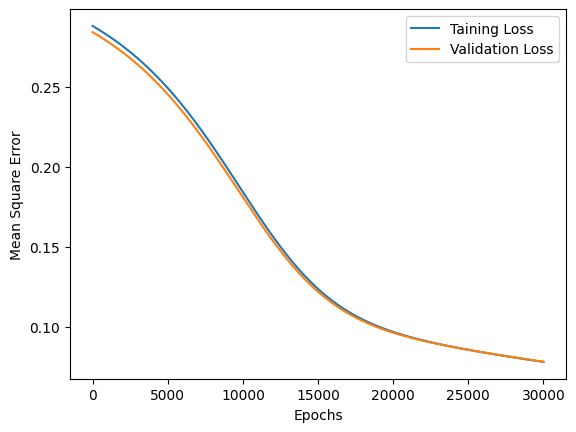

In [ ]:
_, d = X_train.shape
# Initialize the Artificial Neuron model with the determined number of inputs
model = ArtificialNeuron(N=d)

# Train the model on the training data
loss, loss_val = model.train(X_train, Y_train, X_val, y_val, 30000)

# Plot the training and validation
plt.plot(loss, label="Taining Loss")
plt.plot(loss_val, label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")

**Energy output prediction using MLPs in TensorFlow - Regression - Code Sample**

In [ ]:
# Import requires libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
class MLP:
    def __init__(self,n_input=2,n_hidden=4, n_output=1, act_func=[tf.nn.elu, tf.sigmoid], learning_rate= 0.001):
        self.n_input = n_input # Number of inputs to the neuron
        self.act_fn = act_func
        seed = 123

        # Placeholder for input data
        self.X = tf.placeholder(tf.float32, name='X', shape=[None,n_input])
        # Placeholder for output data
        self.y = tf.placeholder(tf.float32, name='Y')

        # Build the graph for a single neuron
        # Hidden layer
        self.W1 = tf.Variable(tf.random_normal([n_input,n_hidden], stddev=2, seed = seed), name = "weights")
        self.b1 = tf.Variable(tf.random_normal([1, n_hidden], seed = seed), name="bias")
        tf.summary.histogram("Weights_Layer_1",self.W1)
        tf.summary.histogram("Bias_Layer_1", self.b1)


        # Output Layer
        self.W2 = tf.Variable(tf.random_normal([n_hidden,n_output], stddev=2, seed = 0), name = "weights")
        self.b2 = tf.Variable(tf.random_normal([1, n_output], seed = seed), name="bias")
        tf.summary.histogram("Weights_Layer_2",self.W2)
        tf.summary.histogram("Bias_Layer_2", self.b2)


        activity = tf.matmul(self.X, self.W1) + self.b1 #
        h1 = self.act_fn[0](activity)

        activity = tf.matmul(h1, self.W2) + self.b2
        self.y_hat = self.act_fn[1](activity)


        error = self.y - self.y_hat

        self.loss = tf.reduce_mean(tf.square(error)) + 0.6*tf.nn.l2_loss(self.W1) #+ 0.6*tf.nn.l2_loss(self.W2)
        self.opt =  tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(self.loss)


        tf.summary.scalar("loss",self.loss)
        init = tf.global_variables_initializer()

        self.sess = tf.Session()
        self.sess.run(init)

        self.merge = tf.summary.merge_all()
        self.writer = tf.summary.FileWriter("logs/", graph=tf.get_default_graph())



    def train(self, X, Y, X_val, Y_val, epochs=100):
        epoch = 0
        X, Y = shuffle(X,Y)
        loss = []
        loss_val = []
        while epoch < epochs:
            # Run the optimizer for the whole training set batch wise (Stochastic Gradient Descent)
            merge, _, l = self.sess.run([self.merge,self.opt,self.loss], feed_dict={self.X: X, self.y: Y})
            l_val = self.sess.run(self.loss, feed_dict={self.X: X_val, self.y: Y_val})

            loss.append(l)
            loss_val.append(l_val)
            self.writer.add_summary(merge, epoch)

            if epoch % 10 == 0:
                print("Epoch {}/{}  training loss: {} Validation loss {}".\
                      format(epoch,epochs,l, l_val ))


            epoch += 1
        return loss, loss_val

    def predict(self, X):
        return self.sess.run(self.y_hat, feed_dict={self.X: X})

In [ ]:
filename = 'Folds5x2_pp.xlsx'
df = pd.read_excel(filename, sheet_name='Sheet1')
X, Y = df[['AT', 'V','AP','RH']], df['PE']
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
target_scaler = MinMaxScaler()
Y_new = target_scaler.fit_transform(Y.values.reshape(-1,1))
X_train, X_val, Y_train, y_val = \
  train_test_split(X_new, Y_new, test_size=0.4, random_state=333)

In [ ]:
_, d = X_train.shape
_, n = Y_train.shape

# import tensorflow 1.0
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # disable tensorflow v2 - wasn't compatible with the code

model = MLP(n_input=d, n_hidden=15, n_output=n)

loss, loss_val = model.train(X_train, Y_train, X_val, y_val, 6000)

Instructions for updating:
non-resource variables are not supported in the long term


Epoch 0/6000  training loss: 108.84590911865234 Validation loss 108.71925354003906
Epoch 10/6000  training loss: 107.54991912841797 Validation loss 107.42478942871094
Epoch 20/6000  training loss: 106.2693862915039 Validation loss 106.14578247070312
Epoch 30/6000  training loss: 105.00411224365234 Validation loss 104.88204193115234
Epoch 40/6000  training loss: 103.75394439697266 Validation loss 103.63336181640625
Epoch 50/6000  training loss: 102.5186996459961 Validation loss 102.39956665039062
Epoch 60/6000  training loss: 101.29817199707031 Validation loss 101.18050384521484
Epoch 70/6000  training loss: 100.09220886230469 Validation loss 99.9759750366211
Epoch 80/6000  training loss: 98.90061950683594 Validation loss 98.78582763671875
Epoch 90/6000  training loss: 97.72327423095703 Validation loss 97.60985565185547
Epoch 100/6000  training loss: 96.5599365234375 Validation loss 96.44792175292969
Epoch 110/6000  training loss: 95.41047668457031 Validation loss 95.2998275756836
Epoch

Text(0, 0.5, 'Mean Square Error')

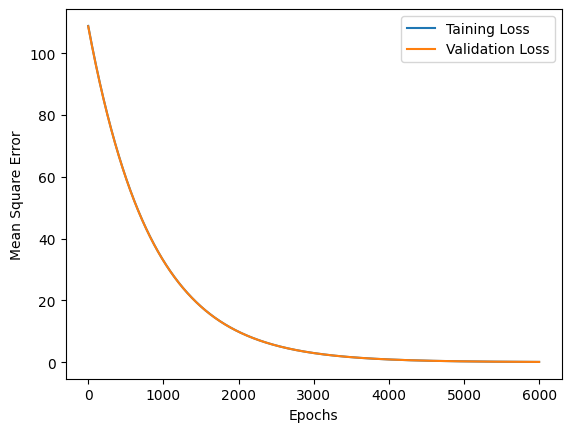

In [ ]:
plt.plot(loss, label="Taining Loss")
plt.plot(loss_val, label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")

In [ ]:
Y_pred = model.predict(np.float32(X_val))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("R2 Score is {} and MSE {}".format(\
       r2_score(y_val, Y_pred),\
       mean_squared_error(y_val, Y_pred)))

R2 Score is 0.6767650419256344 and MSE 0.016636407741512267


**Wine quality classification using MLPs in TensorFlow - Code Sample**

In [ ]:
#import required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
class MLP:
    def __init__(self,n_input=2,n_hidden=4, n_output=1, act_func=[tf.nn.relu, tf.nn.sigmoid], learning_rate= 0.001):
        self.n_input = n_input # Number of inputs to the neuron
        self.act_fn = act_func
        seed = 456

        self.X = tf.placeholder(tf.float32, name='X', shape=[None,n_input])
        self.y = tf.placeholder(tf.float32, name='Y')

        # Build the graph for a single neuron
        # Hidden layer
        self.W1 = tf.Variable(tf.random_normal([n_input,n_hidden], stddev=2, seed = seed), name = "weights")
        self.b1 = tf.Variable(tf.random_normal([1, n_hidden], seed = seed), name="bias")
        tf.summary.histogram("Weights_Layer_1",self.W1)
        tf.summary.histogram("Bias_Layer_1", self.b1)


        # Output Layer
        self.W2 = tf.Variable(tf.random_normal([n_hidden,n_output], stddev=2, seed = seed), name = "weights")
        self.b2 = tf.Variable(tf.random_normal([1, n_output], seed = seed), name="bias")
        tf.summary.histogram("Weights_Layer_2",self.W2)
        tf.summary.histogram("Bias_Layer_2", self.b2)


        activity1 = tf.matmul(self.X, self.W1) + self.b1
        h1 = self.act_fn[0](activity1)

        activity2 = tf.matmul(h1, self.W2) + self.b2
        self.y_hat = self.act_fn[1](activity2)


        self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.y_hat, labels=self.y))
        self.opt =  tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(self.loss)


        tf.summary.scalar("loss",self.loss)
        init = tf.global_variables_initializer()

        self.sess = tf.Session()
        self.sess.run(init)

        self.merge = tf.summary.merge_all()
        self.writer = tf.summary.FileWriter("logs/", graph=tf.get_default_graph())



    def train(self, X, Y, X_val, Y_val, epochs=100):
        epoch = 0
        X, Y = shuffle(X,Y)
        loss = []
        loss_val = []
        while epoch < epochs:
            # Run the optimizer for the whole training set batch wise (Stochastic Gradient Descent)
            merge, _, l = self.sess.run([self.merge,self.opt,self.loss], feed_dict={self.X: X, self.y: Y})
            l_val = self.sess.run(self.loss, feed_dict={self.X: X_val, self.y: Y_val})

            loss.append(l)
            loss_val.append(l_val)
            self.writer.add_summary(merge, epoch)

            if epoch % 10 == 0:
                print("Epoch {}/{}  training loss: {} Validation loss {}".\
                      format(epoch,epochs,l, l_val ))


            epoch += 1
        return loss, loss_val

    def predict(self, X):
        return self.sess.run(self.y_hat, feed_dict={self.X: X})

In [ ]:
filename = 'winequality-red.csv'
df = pd.read_csv(filename, sep=';')
columns = df.columns.values
# Preprocessing and Categorizing wine into two categories
X, Y = df[columns[0:-1]], df[columns[-1]]
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
#Y.loc[(Y<3.5)]=3
Y.loc[(Y<5.5) ] = 2
Y.loc[(Y>=5.5)] = 1
Y_new = pd.get_dummies(Y)  # One hot encode
X_train, X_val, Y_train, y_val = \
  train_test_split(X_new, Y_new, test_size=0.2, random_state=333)

<ipython-input-64-5dc1c98865bd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.loc[(Y<5.5) ] = 2
<ipython-input-64-5dc1c98865bd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.loc[(Y>=5.5)] = 1


In [ ]:
# Determine the number of features (inputs) from the training data
_, d = X_train.shape  # Get the number of features from the shape of X_train
_, n = Y_train.shape  # Get the number of classes from the shape of Y_train

# Initialize the Artificial Neuron model with the determined number of inputs
model = ArtificialNeuron(N=d)

# Train the model on the training data and validate on the validation data
loss, loss_val = model.train(X_train, Y_train, X_val, y_val, 10000)  # Train for 10,000 epochs


Epoch 0/10000  training loss: 0.29491132497787476 Validation loss 0.29648494720458984
Epoch 10/10000  training loss: 0.2948431372642517 Validation loss 0.2964131534099579
Epoch 20/10000  training loss: 0.2947750985622406 Validation loss 0.2963414788246155
Epoch 30/10000  training loss: 0.29470720887184143 Validation loss 0.2962699830532074
Epoch 40/10000  training loss: 0.2946394979953766 Validation loss 0.29619863629341125
Epoch 50/10000  training loss: 0.2945719361305237 Validation loss 0.2961274981498718
Epoch 60/10000  training loss: 0.2945045232772827 Validation loss 0.29605647921562195
Epoch 70/10000  training loss: 0.2944372892379761 Validation loss 0.2959856390953064
Epoch 80/10000  training loss: 0.29437020421028137 Validation loss 0.2959149479866028
Epoch 90/10000  training loss: 0.29430320858955383 Validation loss 0.2958443760871887
Epoch 100/10000  training loss: 0.2942363917827606 Validation loss 0.295773983001709
Epoch 110/10000  training loss: 0.29416972398757935 Validat

Text(0, 0.5, 'Cross Entropy Loss')

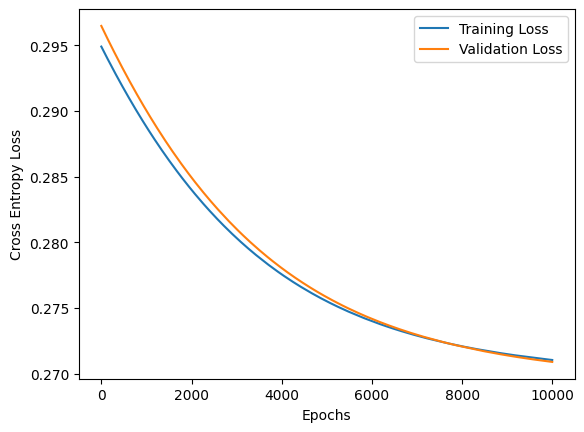

In [ ]:
# Plot training loss
plt.plot(loss, label="Training Loss")
plt.plot(loss_val, label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")

# I'm not sure why the graph looks different than the textbook

In [ ]:
Y_pred = model.predict(np.float32(X_val))  # Make predictions on the validation data

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score  # Import mean squared error and R-squared score
accuracy = sum(np.argmax(Y_pred,1) == np.argmax(np.array(y_val),1))/len(y_val)  # Calculate accuracy
print(accuracy)  # Print the accuracy

0.540625


<Axes: >

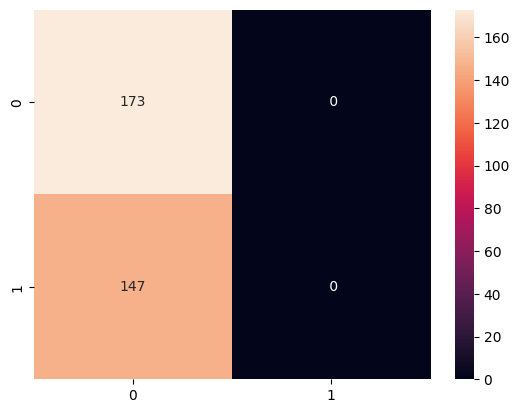

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score  # Import confusion matrix and accuracy score
accuracy = accuracy_score(np.argmax(np.array(y_val),1), np.argmax(Y_pred,1))  # Calculate accuracy
print(accuracy)  # Print the accuracy
import seaborn as sns
cm = confusion_matrix(np.argmax(np.array(y_val),1), np.argmax(Y_pred,1))  # Calculate confusion matrix
sns.heatmap(cm,annot=True,fmt='2.0f')  # Plot the confusion matrix

In [ ]:
Y.value_counts()  # Check the distribution of the target variable

quality
1    855
2    744
Name: count, dtype: int64

**Deep Learning Use Case Example**

Deep learning can be used to train a neural network to recognize objects in images. For example, you can train a model to identify whether a photo contains a beach or a mountain. By feeding the model thousands of labeled images of beaches and mountains, the neural network can learn to distinguish between the two. Once trained, the model can accurately predict and recognize images of either.


**My experience using this tool**

Understanding TensorFlow and building neural networks were initially fairly difficult to overcome. I had to revert to an earlier version of TensorFlow, which is to be expected. The code from the textbook doesn't always agree with tensorflow 2.0. Despite these challenges, I managed to learn a lot about neural networks and their applications. I successfully implemented a single neuron model and worked through various issues with data normalization and model training. The classifcation and regressions were naturally more complex. Overall, the experience was challenging it gave me valuable insights into deep learning and how MLP models are constructed. I believe I can take them and apply them to a future project.



**Neural Networks**

Neural networks are computational models inspired by the human brain. They consist of interconnected nodes (neurons) organized in layers. Each neuron receives inputs, processes them using weights, and applies an activation function to generate outputs. Neural networks can handle complex patterns and large datasets, making them ideal for tasks like image recognition, natural language processing, and IoT applications.

**Tensor Flow**

TensorFlow is an open-source library created by Google for building and training machine learning models. It provides a flexible platform for building various types of neural networks, including deep learning models like Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs). TensorFlow uses tensors (multi-dimensional arrays) to represent data and operations on data. It is designed to run on different platforms, such as CPUs, GPUs, and even mobile devices, making it very versatile. TensorFlow is widely used for tasks like image recognition, natural language processing, and time series analysis due to its efficiency and scalability.

Convolutional Neural Networks

Convolutional Neural Networks (CNNs) are a type of neural network particularly good at processing images. They work by using special layers called convolutional layers that automatically detect important features in images, like edges, textures, and shapes. These layers scan the image with small filters and create feature maps that highlight these important parts. CNNs are widely used for tasks such as image recognition, object detection, and facial recognition because they can handle the complex structure of images very efficiently. They are also used in applications like self-driving cars, where they help recognize and understand surroundings.

**Convolutional Neural Networks - LeNet to recognize handwritten digits - Code Sample**

In [ ]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Define your Architecture here
import tensorflow as tf
import tensorflow.compat.v1 as tf

# from tensorflow.contrib.layers import flatten <---- Tensoflow.contrib is not available in Tensowflow 2.x
# instead I used updated keras code appropriate for Tensor flow 2.X below

# Flatten a tensor
flatten = tf.keras.layers.Flatten()


class my_LeNet:
    def __init__(self, d, n, mu = 0, sigma = 0.1, lr = 0.001):
        self.mu = mu
        self.sigma = sigma
        self.n = n
        self.x = tf.placeholder(tf.float32, (None, d, d, 1))  # place holder for input image dimension 28 x 28
        self.y = tf.placeholder(tf.int32, (None,n))
        self.keep_prob = tf.placeholder(tf.float32) # probability to keep units


        self.logits = self.model(self.x)

        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=self.y, logits=self.logits)
        self.loss = tf.reduce_mean(cross_entropy)
        optimizer = tf.train.AdamOptimizer(learning_rate = lr)
        self.train = optimizer.minimize(self.loss)
        correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        init = tf.global_variables_initializer()
        self.sess = tf.Session()
        self.sess.run(init)
        self.saver = tf.train.Saver()



    def model(self,x):
        # Build Architecture
        keep_prob = 0.7
        # Layer 1: Convolutional. Filter 5x5 num_filters = 6 Input_depth =1
        conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = self.mu, stddev = self.sigma))
        conv1_b = tf.Variable(tf.zeros(6))
        conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
        conv1 = tf.nn.relu(conv1)

        # Max Pool 1
        self.conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')


        # Layer 2: Convolutional. Filter 5x5 num_filters = 16  Input_depth =6
        conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = self.mu, stddev = self.sigma))
        conv2_b = tf.Variable(tf.zeros(16))
        conv2   = tf.nn.conv2d(self.conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
        conv2 = tf.nn.relu(conv2)

        # Max Pool 2.
        self.conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

        # Flatten.
        fc0   = flatten(self.conv2)
        print("x shape:",fc0.get_shape())

        # Layer 3: Fully Connected. Input = fc0.get_shape[-1]. Output = 120.
        fc1_W = tf.Variable(tf.truncated_normal(shape=(256, 120), mean = self.mu, stddev = self.sigma))
        fc1_b = tf.Variable(tf.zeros(120))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b
        fc1    = tf.nn.relu(fc1)

        # Dropout
        x = tf.nn.dropout(fc1, keep_prob)

        # Layer 4: Fully Connected. Input = 120. Output = 84.
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = self.mu, stddev = self.sigma))
        fc2_b  = tf.Variable(tf.zeros(84))
        fc2    = tf.matmul(x, fc2_W) + fc2_b
        fc2    = tf.nn.relu(fc2)

        # Dropout
        x = tf.nn.dropout(fc2, keep_prob)

        # Layer 6: Fully Connected. Input = 120. Output = n_classes.
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, self.n), mean = self.mu, stddev = self.sigma))
        fc3_b  = tf.Variable(tf.zeros(self.n))
        logits = tf.matmul(x, fc3_W) + fc3_b
        #logits = tf.nn.softmax(logits)
        return logits

    def fit(self,X,Y,X_val,Y_val,epochs=10, batch_size=100):
        X_train, y_train = X, Y
        num_examples = len(X_train)
        l = []
        val_l = []
        max_val = 0
        for i in range(epochs):
            total = 0
            for offset in range(0, num_examples, batch_size):  # Learn Batch wise
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                _, loss = self.sess.run([self.train,self.loss], feed_dict={self.x: batch_x, self.y: batch_y})
                total += loss
            l.append(total/num_examples)
            accuracy_val = self.sess.run(self.accuracy, feed_dict={self.x: X_val, self.y: Y_val})
            accuracy = self.sess.run(self.accuracy, feed_dict={self.x: X, self.y: Y})
            loss_val = self.sess.run(self.loss, feed_dict={self.x:X_val,self.y:Y_val})
            val_l.append(loss_val)
            print("EPOCH {}/{} loss is {:.3f} training_accuracy {:.3f} and validation accuracy is {:.3f}".\
                  format(i+1,epochs,total/num_examples, accuracy, accuracy_val))
            if accuracy_val > max_val:
                save_path = self.saver.save(self.sess, "/tmp/lenet1.ckpt")
                print("Model saved in path: %s" % save_path)
                max_val = accuracy_val

        self.saver.restore(self.sess, "/tmp/lenet1.ckpt")
        print("Restored model with highest validation accuracy")
        accuracy_val = self.sess.run(self.accuracy, feed_dict={self.x: X_val, self.y: Y_val})
        accuracy = self.sess.run(self.accuracy, feed_dict={self.x: X, self.y: Y})
        return l,val_l, accuracy, accuracy_val

    def predict(self, X):
        return self.sess.run(self.logits,feed_dict={self.x:X})

In [ ]:
def load_data():
    # Read the data and create train, validation, and test datasets
    data = pd.read_csv('train.csv')
    train = data.sample(frac=0.8, random_state=255)   # This ensures always 80% of data is training and rest Validation unlike using np.random
    val = data.drop(train.index)
    test = pd.read_csv('test.csv')
    return train, val, test

def create_data(df):
    labels = df.loc[:]['label']
    y_one_hot = pd.get_dummies(labels).astype(np.uint8)
    y = y_one_hot.values  # One Hot encode the labels
    x = df.iloc[:, :-1].values
    x = x.astype(np.float64)    # Use np.float64 instead of np.float
    # Normalize data
    x = np.multiply(x, 1.0 / 255.0)
    x = x.reshape(-1, 32, 32, 1)  # Return each image as 32x32x1
    return x, y

train, val, test = load_data()
X_train, y_train = create_data(train)
X_val, y_val = create_data(val)
X_test = (test.iloc[:, :-1].values).astype(np.float64)  # Use np.float64 instead of np.float
X_test = np.multiply(X_test, 1.0 / 255.0)
X_test = X_test.reshape(-1, 32, 32, 1)  # Return each image as 32x32x1

I had to change "np.float" to "np.float64" because it was depreciated

In [ ]:
# take subset of training data
x_train_subset = X_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20, 2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i + 1)
    ax.imshow(x_train_subset[i].reshape(32, 32), cmap='gray')  # Reshape to 32x32
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

NameError: name 'X_train' is not defined

In [ ]:
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_val)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an handwritten digits?
image_shape = X_train.shape[1:-1]

# How many unique classes/labels there are in the dataset.
n_classes = y_train.shape[-1]

print("Number of training examples =", n_train)
print("Number of Validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

NameError: name 'X_train' is not defined

In [ ]:
# Define the data values
d = image_shape[0]
n = n_classes
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train,y_train)

NameError: name 'image_shape' is not defined

In [ ]:
# Create the Model
my_model = my_LeNet(d, n)

NameError: name 'd' is not defined

I could not continue because I got this error. I think the code is not compatible with tensorflow in Google Collabs.

**Use case examples**

Smartphones like the iPhone use Convolutional Neural Networks to analyze and recognize facial features for unlocking the device. The Convolutional Neural Networks processes the image captured by the front camera, extracting unique features of the user's face and then matches these features to the stored facial data.

**My experience using this tool**

Building a convuluted neural network using the LeNet architecture was challenging due to Google Collab no longer supporting from TensorFlow 1.x and changing to to 2.x. The primary issue was the deprecation of tf.placeholder, leading to an AttributeError. I initially used tf.compat.v1 to enable compatibility mode but ultimately adopted TensorFlow 2.x practices using tf.keras. I became stuck on the "# Create the Model
my_model = my_LeNet(d, n)" section of the code because I got an error saying  module 'tensorflow' has no attribute 'placeholder'
